In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from geopy.geocoders import Nominatim as geonom
%matplotlib inline

from rain_analysis import get_resampled_rainfall

## Visualizing Rainfall data

### Time series visualizations

In [6]:
# Get data as a dataframe with a single location index (lat, long) & time index
# This is easy to work with for plotting time series and exploring the dataframe
dd = get_resampled_rainfall("../data/rain fall data 2023.csv", rez="D", geoout=False)

In [7]:
dd.head()

APCP_sfc
lat_long                   time                
(14.52, 74.03999999999999) 2023-01-01       0.0
                           2023-01-02       0.0
                           2023-01-03       0.0
                           2023-01-04       0.0
                           2023-01-05       0.0

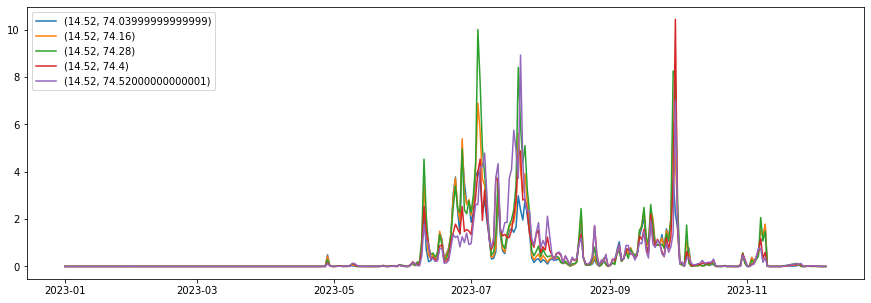

In [22]:
# Let us plot time series for the first N locations

# Get all the locations measured
lat_longs = dd.index.levels[0]

plt.figure(figsize=(15, 5))
# Iterate through first N locations
N = 5
for ll in range(N):
    x = dd.loc[lat_longs[ll]]
    plt.plot(x, label=lat_longs[ll])
plt.legend()

### Map visualization

In [3]:
# Get a geopandas dataframe with columns of geopandas points (lat, long locations)
# and second index is time. 
# This is not as easy to work with for dataframe exploration & manipulation /time series
# plotting because the geopandas points can not be made into an index - this makes it
# hard to visualize the dataframe and get all the data at a single location.
gd = get_resampled_rainfall("rainfalldata2023.csv", rez="M", geoout=True)

In [4]:
# Choose the time point at which we want to make a map
snapshot = gd.loc[gd['time'] == "2023-09-30"].drop("time", axis=1)

In [5]:
# Get world map for background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

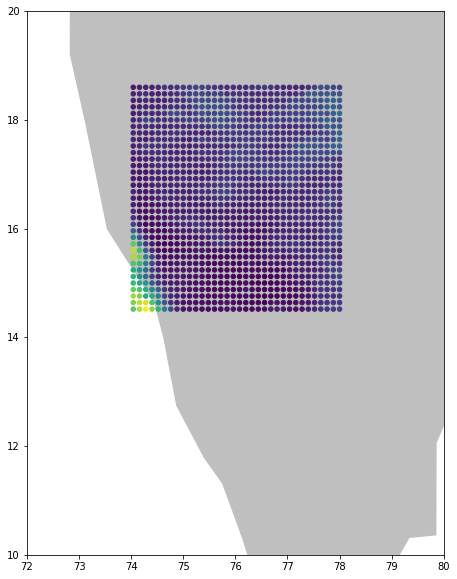

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot INDIA
world.plot(ax=ax, color="grey", alpha=0.5)
ax.set_xlim([72, 80])
ax.set_ylim([10, 20])

# Plot rainfall data overlay
snapshot.plot(column="APCP_sfc", ax=ax, markersize=20)

#### Make this interactive so we can see evolution over time.

In [20]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

all_times = gd["time"].unique()
T = len(all_times)

def plot_map(t):
    snapshot = gd.loc[gd['time'] == all_times[t]].drop("time", axis=1)
    fig, ax = plt.subplots(1, 1, figsize=(10, 15))

    # Plot INDIA
    world.plot(ax=ax, color="grey", alpha=0.5)
    ax.set_xlim([70, 82])
    ax.set_ylim([8, 22])

    # Plot rainfall data overlay
    snapshot.plot(column="APCP_sfc", ax=ax, markersize=50)

In [21]:
interact(plot_map, t = widgets.IntSlider(value=0,
                                           min=0,
                                           max=T-1,
                                           step=1))

interactive(children=(IntSlider(value=0, description='t', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_map(t)>

### Trying to get place names from lat/long
This leverages a package called [geopy](https://geopy.readthedocs.io/en/stable/) - but seems to just give "India" rather than a nearby town or city.

In [14]:
get_place = geonom(user_agent="jupyter")

lat_longs = dd.index.levels[0]
print(lat_longs[0][0], lat_longs[0][1])

place = get_place.geocode(str(lat_longs[0][0])+","+str(lat_longs[0][1]))
print(place)

14.52 74.03999999999999
India
